In [ ]:
""" for doing inference, given parses (already pre-extracted) and 
those already extracted into programs 
(see parsing_and_convert...)

Then, here, given model params, infers top K motor programs
"""

In [1]:
from pythonlib.tools.expttools import findPath
from pythonlib.dataset.dataset import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [5]:
##### Load dataset
animal = "Red"
expt = "lines5"
D = Dataset([])
D.load_dataset_helper(animal, expt)


# Load pre-extracted motor programs (behavior)
D.bpl_load_motorprograms()

# Load pre-extracted parses
D.parsesLoadAndExtract()

Did not load data!!!
Searching using this string:
/data2/analyses/database//*Red*lines5*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/data2/analyses/database/Red-lines5-formodeling-210329_005719
Searching using this string:
/data2/analyses/database/BEH/*Red*lines5*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
----------------
Currently loading: /data2/analyses/database/Red-lines5-formodeling-210329_005719
Loaded metadat:
{'sketchpad_edges': array([[-327.2, -327.2],
       [ 327.2,  429.6]])}
----
Resetting index
=== CLEANING UP self.Dat ===== 
ORIGINAL: online abort values
Series([], Name: online_abort, dtype: int64)
kept 5599 out of 5599
removed all cases with online abort not None
Deleted unused columns from self.Dat
Searching using this string:
/data2/analyses/database/Red-lines5-formodeling-210329_005719/*infer_MPs_from_strokes*/*params*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/data2/analyses/database/Red-lin

In [48]:
# Subsample D, to make things quicker. only take test tasks, since those are the only ones which will use
# for scoring
F = {"monkey_train_or_test":["train"]}
Dtrain = D.filterPandas(F, "dataset")
F = {"monkey_train_or_test":["test"]}
Dtest = D.filterPandas(F, "dataset")


Did not load data!!!


In [22]:
Dtest.parses_load_motor_programs()

Searching using this string:
/data2/analyses/database/Red-lines5-formodeling-210329_005719/*MPs_for_parses*/*infer_MPs_from_strokes*/*params*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/data2/analyses/database/Red-lines5-formodeling-210329_005719/MPs_for_parses/infer_MPs_from_strokes-210503_110412
200922-1-404
200922-1-414
200922-1-426
200922-1-435
200922-1-453
200922-1-454
200922-1-467
200922-1-469
200922-1-470
200922-1-517
200922-1-532
200922-1-568
200922-1-576
200922-1-586
200922-1-624
200922-1-625
200922-1-645
200922-1-664
200922-1-684
200922-1-709
200922-1-723
200922-1-768
200922-1-773
200922-1-838
200922-1-849
200922-1-852
200922-1-858
200922-1-882
200923-1-231
200923-1-308
200923-1-310
200923-1-311
200923-1-312
200923-1-315
200923-1-324
200923-1-331
200923-1-336
200923-1-337
200923-1-340
200923-1-342
200923-1-343
200923-1-348
200923-1-358
200923-1-387
200923-1-395
200923-1-415
200923-1-422
200923-1-426
200923-1-435
200923-1-440
200923-1-443
200923-1-444
200

201001-1-99
201001-1-103
201001-1-104
201001-1-108
201001-1-109
201001-1-111
201001-1-112
201001-1-113
201001-1-118
201001-1-122
201001-1-124
201001-1-125
201001-1-127
201001-1-128
201001-1-134
201001-1-136
201001-1-138
201001-1-139
201001-1-141
201001-1-146
201001-1-147
201001-1-149
201001-1-150
201001-1-183
201001-1-188
201001-1-189
201001-1-193
201001-1-195
201001-1-197
201001-1-200
201001-1-201
201001-1-204
201001-1-205
201001-1-207
201001-1-209
201001-1-210
201001-1-212
201001-1-220
201001-1-230
201001-1-232
201001-1-236
201001-1-237
201001-1-238
201001-1-241
201001-1-242
201001-1-245
201001-1-246
201001-1-247
201001-1-249
201001-1-253
201001-1-254
201001-1-255
201001-1-256
201001-1-264
201001-1-265
201001-1-266
201001-1-270
201001-1-273
201001-1-276
201001-1-277
201001-1-279
201001-1-280
201001-1-285
201001-1-287
201001-1-288
201001-1-290
201001-1-291
201001-1-293
201001-1-294
201001-1-296
201001-1-297
201001-1-301
201001-1-303
201001-1-304
201001-1-309
201001-1-311
201001-1-312


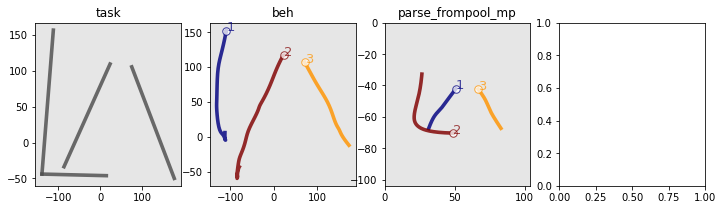

In [47]:
## Plot parsa and behavior for comparison
import random
ind = random.randint(0, len(Dtest.Dat))
Dtest.plotSingleTrial(ind, ["task", "beh", "parse_frompool_mp"], sharex=False, sharey=False, params={"parse_ind":0});


In [117]:
### Load refitted models
# - use the dataset with training tasks
gb = ["animal", "expt", "epoch", "monkey_train_or_test"]
del Dtrain.BPL["refits"]
Dtrain.bpl_refit_libraries_to_MPs(gb = gb)

Dtest.Dat["task_stagecategory"].value_counts()

# This is just for debugging
F = {"task_stagecategory":["LplusL"]}
DtestSub = Dtest.filterPandas(F, "dataset")

-- refitting libarry to this group
('Red', 'lines5', 1, 'train')
1894
updating these params
['kappa', 'rel_type_mixture', 'prim_type_mixture', 'spatial_hist']
====== DOING kappa
-- Extracted these counts:
[1, 2, 3, 4, 5]
[168, 1193, 517, 14, 2]
-- Using this for prior counts:
[5.84]
cats, this order:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
these probs:
tensor([0.0890, 0.6140, 0.2678, 0.0102, 0.0040, 0.0030, 0.0030, 0.0030, 0.0030,
        0.0030])
-- Updated lib_update.pkappa
====== DOING rel_type_mixture
-- Extracted these counts:
['end', 'mid', 'unihist']
[8, 160, 4003]
-- Using this for prior counts:
[32.32]
cats, this order:
['unihist', 'start', 'end', 'mid']
these probs:
tensor([0.9384, 0.0075, 0.0094, 0.0447])
-- Updated lib_update.rel['mixprob']
====== DOING prim_type_mixture
-- Extracted these counts:
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 19, 20, 21, 22, 26, 27, 28, 29, 33, 34, 35, 37, 38, 39, 43, 45, 46, 48, 50, 52, 53, 54, 57, 58, 60, 63, 64, 65, 66, 67, 70, 71, 72, 74, 75, 76, 77,

In [264]:
DEBUG = True # then 
if not DEBUG:
    # Score each parse, given each model.
    # 1) transfer models to Dtest
    Dtest.BPL = Dtrain.BPL
    # D.bpl_score_parses_by_libraries(

    # 2) score
    lib_refit_index = 0
    Dtest.bpl_score_parses_by_libraries(lib_refit_index=lib_refit_index)
else:
    DtestSub.BPL = Dtrain.BPL
    DtestSub.bpl_score_parses_by_libraries(lib_refit_index=lib_refit_index)

TypeError: bpl_score_parses_by_libraries() got an unexpected keyword argument 'weights'

In [123]:
# All training (refit) models
lib_index_list = range(len(Dtest.BPL["refits"][lib_refit_index]["libraries"]))
lib_index_list

range(0, 2)

for model bpl-parses-Red-lines5-1-train, parses, in order from best to worst:
[0 9 2 6 5 3 4 7 8 1]
['-103.35', '-104.02', '-106.40', '-107.36', '-109.56', '-128.30', '-129.33', '-132.31', '-157.50', '-187.20']
for model bpl-parses-Red-lines5-2-train, parses, in order from best to worst:
[0 9 2 6 5 4 3 7 8 1]
['-107.19', '-107.74', '-108.63', '-109.01', '-112.31', '-129.25', '-132.14', '-133.96', '-157.08', '-186.74']


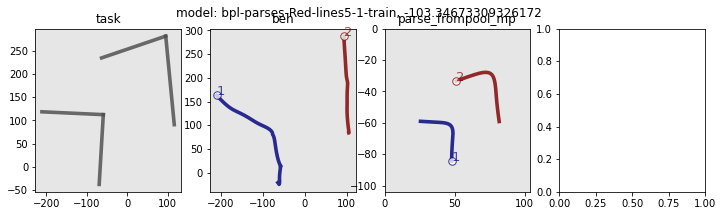

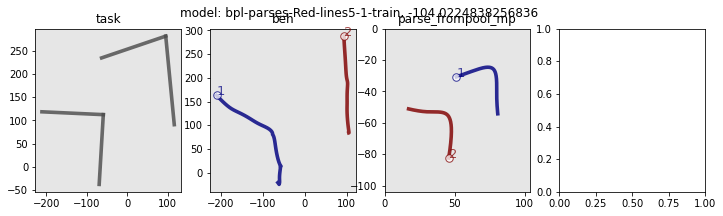

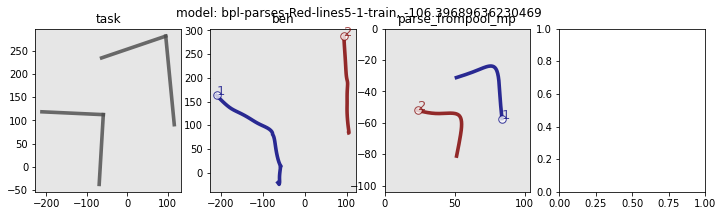

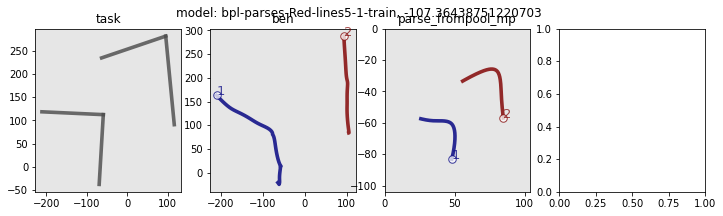

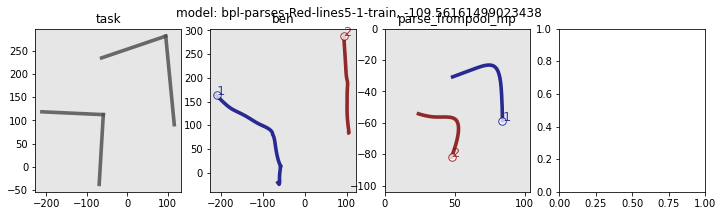

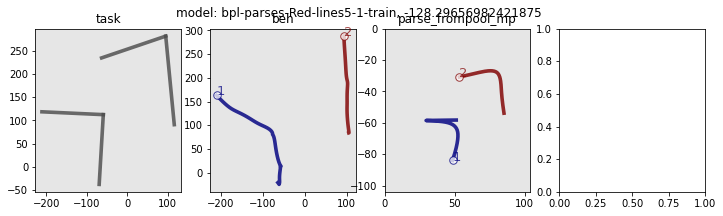

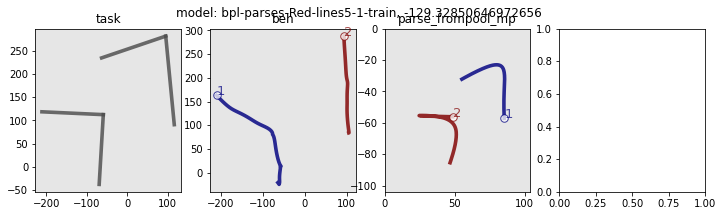

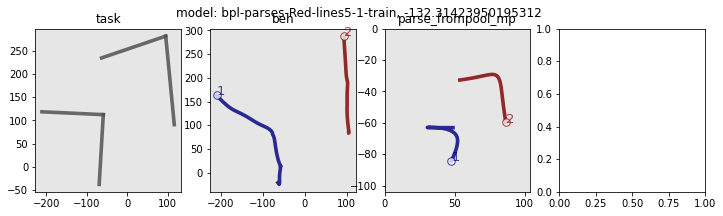

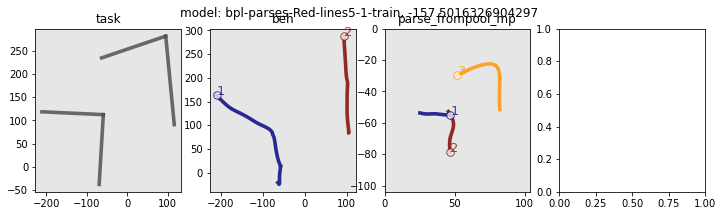

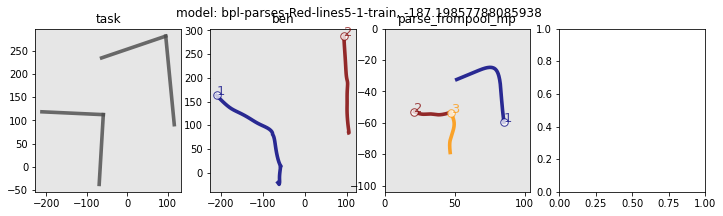

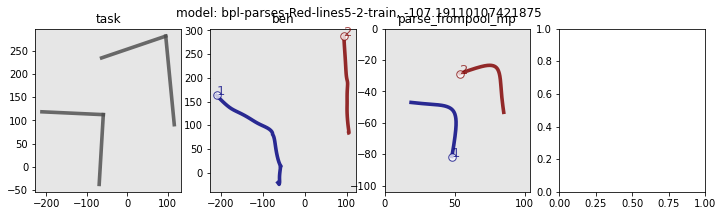

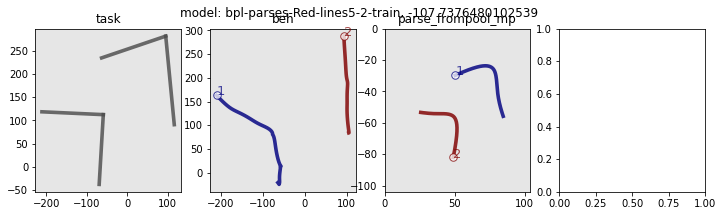

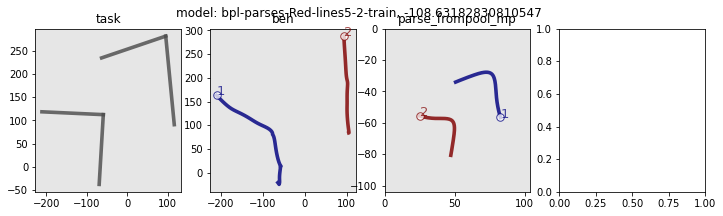

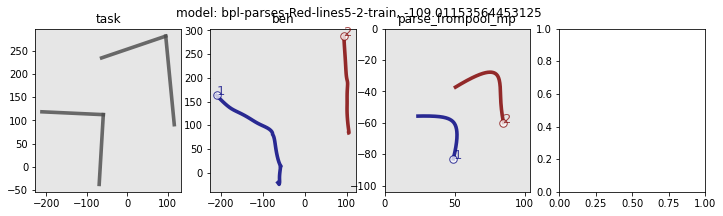

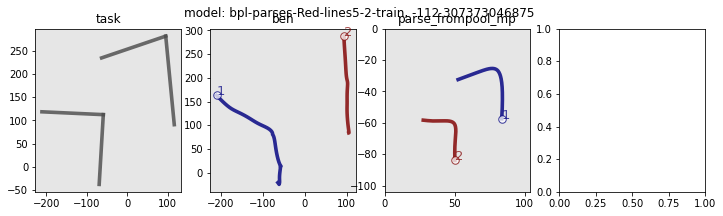

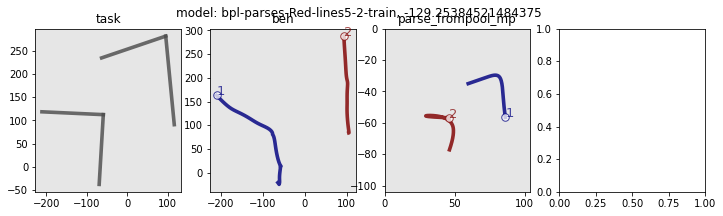

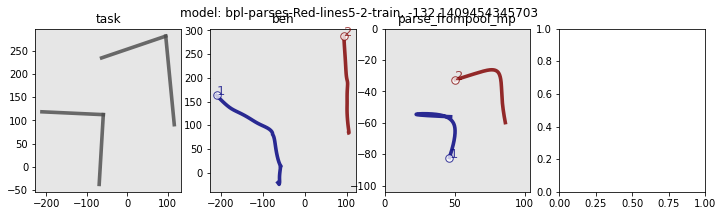

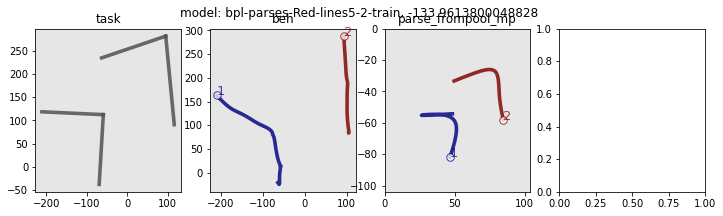

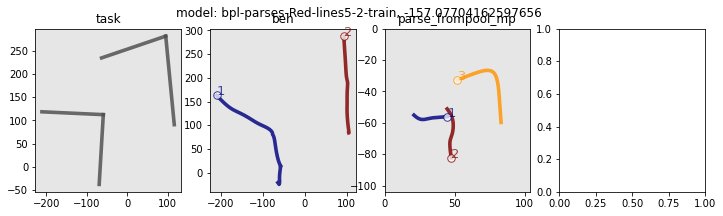

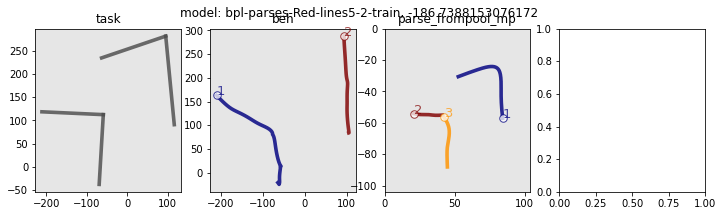

In [261]:
# === Plot example for a single 
# Plot, for this trial, parses in order of best vs. worst score

DTHIS = DtestSub

import random
ind = random.randint(0, len(DTHIS.Dat))

for lib_index in lib_index_list:
    modname = DTHIS.BPL["refits"][lib_refit_index]["libraries"][lib_index]["index_grp"]
    colname = DTHIS.bpl_index_to_col_name(modname, "parses")

    # get parse scores
    scores = np.array(DTHIS.Dat[colname].values[ind])
    inds_besttoworse = np.argsort(scores)[::-1]
    print(f"for model {colname}, parses, in order from best to worst:")
    print(inds_besttoworse)
    print([f"{scores[i]:.2f}" for i in inds_besttoworse])
#     for i in [inds_besttoworse[0], inds_besttoworse[1], inds_besttoworse[-2], inds_besttoworse[-1]]:
    for i in inds_besttoworse:
        score = scores[i]
        fig = DTHIS.plotSingleTrial(ind, ["task", "beh", "parse_frompool_mp"], 
                              sharex=False, sharey=False, params={"parse_ind":i});
        fig.suptitle(f"model: {colname}, {score}")


[<Figure size 432x432 with 4 Axes>,
 <Figure size 432x432 with 4 Axes>,
 <Figure size 432x432 with 4 Axes>]

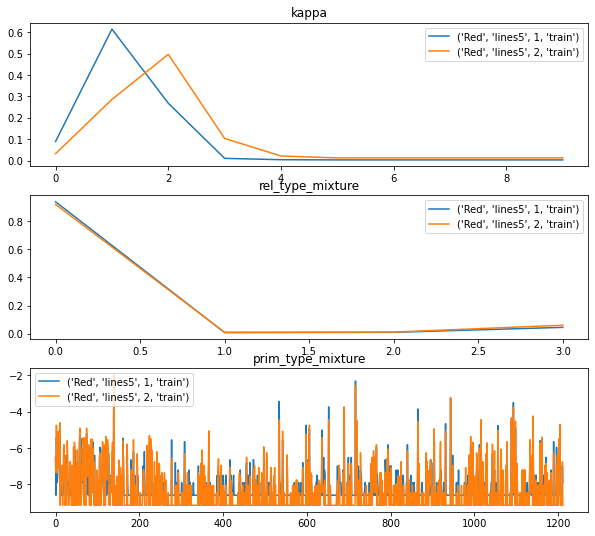

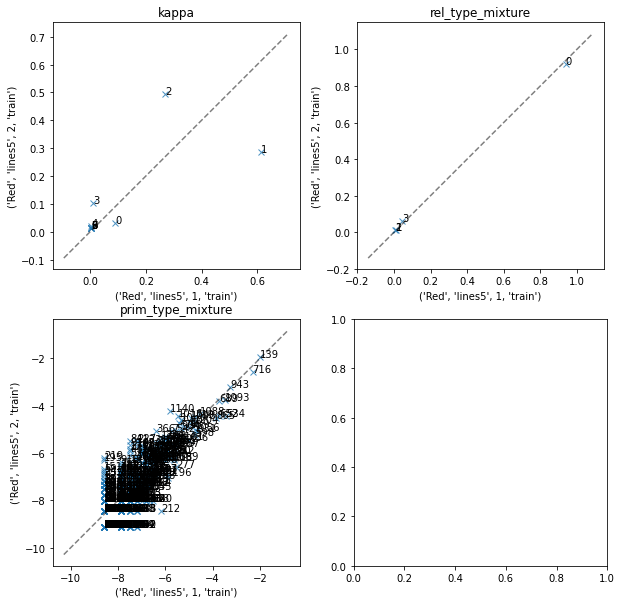

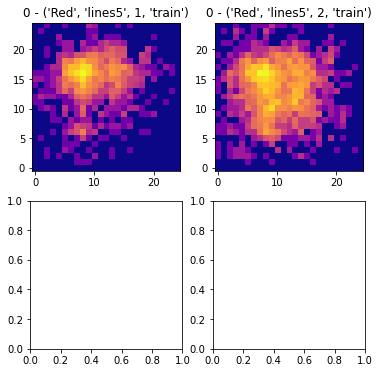

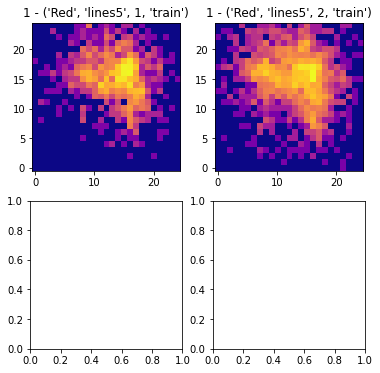

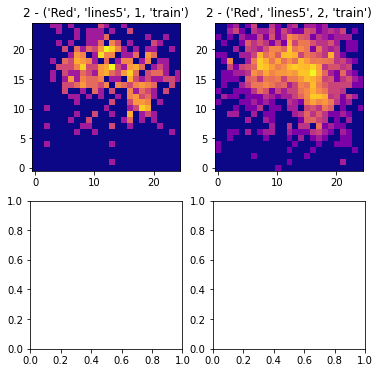

In [272]:
# Plot libraries to compare
from pythonlib.bpl.refitting import plotLibDists1D, plotLibDists2D

libraries_list = Dtest.BPL["refits"][0]["libraries"]
plotLibDists1D(libraries_list)
plotLibDists2D(libraries_list)

### New approach - factorize the score. fit log-linear model using these factors

In [299]:
score_dict = DtestSub.bpl_score_parses_factorized(lib_refit_index)

('Red', 'lines5', 1, 'train')
('Red', 'lines5', 2, 'train')


In [300]:
score_dict[0]

{'lib_index': ('Red', 'lines5', 1, 'train'),
 'trialcode': '200922-1-404',
 'row_num': 0,
 'scores_features': [{'k': array(-1.3175391, dtype=float32),
   'parts': array(-21.748957, dtype=float32),
   'rel': array([-23.855024], dtype=float32)},
  {'k': array(-1.3175391, dtype=float32),
   'parts': array(-23.258747, dtype=float32),
   'rel': array([-22.756413], dtype=float32)},
  {'k': array(-1.3175391, dtype=float32),
   'parts': array(-22.124668, dtype=float32),
   'rel': array([-22.756413], dtype=float32)},
  {'k': array(-1.3175391, dtype=float32),
   'parts': array(-23.003683, dtype=float32),
   'rel': array(-29.277195, dtype=float32)},
  {'k': array(-1.3175391, dtype=float32),
   'parts': array(-18.790003, dtype=float32),
   'rel': array([-26.25292], dtype=float32)},
  {'k': array(-1.3175391, dtype=float32),
   'parts': array(-15.819638, dtype=float32),
   'rel': array([-27.815586], dtype=float32)},
  {'k': array(-1.3175391, dtype=float32),
   'parts': array(-23.258747, dtype=float3

In [307]:
from pythonlib.drawmodel.efficiencycost import Cost

params = {}
params["thetas"] ={"k":(0.1), "parts":(0.2), "rel":(0.3)}
C = Cost(params)
print(C.Params)

C.score_features(score_dict[0]["scores_features"][0])

{'thetas': {'k': (0.1,), 'parts': (0.2,), 'rel': (0.3,)}, 'thetavec': array([0.1, 0.2, 0.3]), 'thetanames': ['k', 'parts', 'rel']}
{'k': array(-1.3175391, dtype=float32), 'parts': array(-21.748957, dtype=float32), 'rel': array([-23.855024], dtype=float32)}


array([-11.63805255])